# **TableNet - E2E Deep Learning Model for Table Detection & Data extraction**



# **1. Business Problem**

# <h2> **1.1 Description** </h2>

Nowadays, With the extend uses of cell phones and scanners to photo and upload document, the requirement for extracting the need information unstructured file i.e files which cantained useful information in the form of table is found to be in excessivly
needed. it is challenging to extact the information from tablular data which maes the uses of deep learning state of the art technique to play. there are two things we encounter from this problem. one is to detect the accurate table from the document and another is to extract date from it succesfully. 

doing this tas sucessfully is still not acomplished yet since detecting table is easy part but extract date from the structure(row and columns) is hard part. in this case study , we will be discussing the deep learning TableNet: a novel end-to-end deep learning model for both table detection and structure recognition. 


__ Problem Statement __


*   to detect the table from as well as  fine grained table structure(rows & columns) from the documents.
*   After detecting the tabular structure , extract the information from themm as well.



# **1.2 Sources/Useful Links**


1.   ICDAR 2017 table dataset :- https://github.com/mawanda-jun/TableTrainNet/tree/master/dataset
2.   marmot dataset https:-https://www.icst.pku.edu.cn/cpdp/sjzy/index.htm


# **1.3 Real world/Business Objectives and Constraints** 



1.   Accuracy between the ground truth tabular information and predicted one should be very high.
2.   the performance of the model is vallidate by f1 score , presion and recall .
3. excution time need to be affortable.



# **2. Deep Learning Problem** 

# **2.1 Data**

# **2.1.1 Data Overview**

The proposed state of the art model and extraction approach is evaluated on the publicly available ICDAR 2013 and Marmot Table datasets.

Additional table structure annotations for the Marmot
data and ICDAR 2013 has also been provided for table labeling the document.


# **2.2 Mapping the real world problem to an DL problem**

# **2.2.1 Type of Deep Leaning Problem**

It is the pixel wise comparision between ground truth with predicted result. it also tells how accuratly the model is preicting the table structure. Hence , it is a classification problem . 

# **2.2.2 Performance Metric**

the performance of the model is vallidate by f1 score , presion and recall .

# **3. Exploratory Data Analysis** 

since we have given two dataset i.e ICDAR 2017 table dataset and marmot dataset respectively. Anotation for both of the dateset has also been available. we will be exploring the detail information regarding this datasets.




In [23]:
import numpy as np 
import pandas as pd
import xml.etree.ElementTree as ET
from PIL import Image
import cv2
import os
import xml.dom.minidom
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input, Concatenate, UpSampling2D

In [ ]:
#seperating xml file from bmp image and storing them in new folder.
source = 'marmot'
destination_1 = 'image'
destination_2 = 'annote'

if os.path.isdir(source):
    data_files = os.listdir(source)
    for file in data_files:
        if (file.endswith("bmp")):
            shutil.move(source+'/'+file,destination_1)
        if (file.endswith("xml")):
            shutil.move(source+'/'+file,destination_2)

In [ ]:
data_files1 = os.listdir('/content/content/MyDrive/table_extraction/table_detection/Images')
data_files2 = os.listdir('/content/content/MyDrive/table_extraction/table_detection/Annotations')
data_files3 = os.listdir('/content/content/MyDrive/table_extraction/image')
data_files4 = os.listdir('/content/content/MyDrive/table_extraction/annote')
print(f'Total images from ICDAR 2017 table dataset is {len(data_files1)}')
print("-"*50)
print(f'Total Annotations from ICDAR 2017 table dataset is {len(data_files2)}')
print("-"*50)
print(f'Total images from marmot dataset is {len(data_files3)}')
print("-"*50)
print(f'Total Annotations from marmot dataset is {len(data_files4)}')

Total images from ICDAR 2017 table dataset is 1600
--------------------------------------------------
Total Annotations from ICDAR 2017 table dataset is 1600
--------------------------------------------------
Total images from marmot dataset is 509
--------------------------------------------------
Total Annotations from marmot dataset is 495


Total number of image of ICDAR 2017 is same as corresponding Annotations file. There are altogether 14 annotation file are missing for marmot dataset .

# we will check for the marmot dataset 

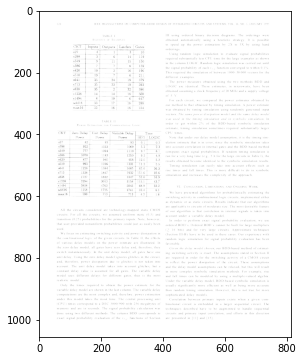

In [ ]:
#showing random image file from marmot dataset
image = cv2.imread('/content/content/MyDrive/table_extraction/image/10.1.1.1.2129_6.bmp',cv2.IMREAD_UNCHANGED)
plt.figure(figsize=(20,6))
plt.imshow(image)

In [49]:
#showing corresponding Annotation of image.
with open('/content/content/MyDrive/table_extraction/annote/10.1.1.1.2129_6.xml') as xml_file:
    xml_file = xml.dom.minidom.parseString(xml_file.read()) 
    xml_file = xml_file.toprettyxml()
print (xml_file)

<?xml version="1.0" ?>
<annotation>
	
	
	<folder>MARMOT_ANNOTATION</folder>
	
	
	<filename>10.1.1.1.2129_6.bmp</filename>
	
	
	<path>/home/shubham/Desktop/MARMOT_ANNOTATION/10.1.1.1.2129_6.bmp</path>
	
	
	<source>
		
		
		<database>Unknown</database>
		
	
	</source>
	
	
	<size>
		
		
		<width>816</width>
		
		
		<height>1056</height>
		
		
		<depth>1</depth>
		
	
	</size>
	
	
	<segmented>0</segmented>
	
	
	<object>
		
		
		<name>column</name>
		
		
		<pose>Unspecified</pose>
		
		
		<truncated>0</truncated>
		
		
		<difficult>0</difficult>
		
		
		<bndbox>
			
			
			<xmin>108</xmin>
			
			
			<ymin>109</ymin>
			
			
			<xmax>143</xmax>
			
			
			<ymax>322</ymax>
			
		
		</bndbox>
		
	
	</object>
	
	
	<object>
		
		
		<name>column</name>
		
		
		<pose>Unspecified</pose>
		
		
		<truncated>0</truncated>
		
		
		<difficult>0</difficult>
		
		
		<bndbox>
			
			
			<xmin>160</xmin>
			
			
			<ymin>109</ymin>
			
			
			<xmax>190</xmax>
			
			
			<ymax>321</ymax>
			
		
		</bndbox>
	

##Observation:
from the above .xml file , tabular structure has been be capture in the co-ordinate within the <bndbox> format. we need to extract these cordinate to create mask out of it.

Populating the interactive namespace from numpy and matplotlib


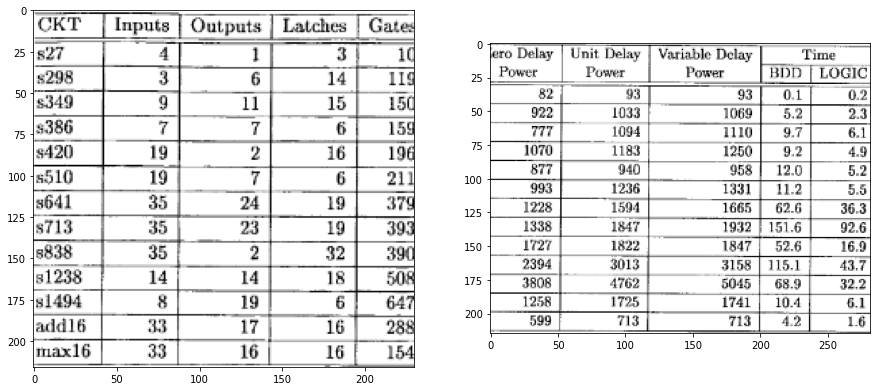

In [7]:
##manually substituting the co-ordinates to crop the image to get the table structure from it.
%pylab inline
img=Image.open('/content/content/MyDrive/table_extraction/image/10.1.1.1.2129_6.bmp')

xmin = [108,160,204,259,313,359,319,238,173,111,56]
ymin = [109,109,112,111,112,407,406,390,389,391,389]
xmax = [143,190,246,297,338,393,343,304,224,157,92]
ymax = [322,321,322,322,325,601,604,601,602,604,603]

l1 , l2 = list(),list()
a = 0
for j , i  in enumerate(ymin):
  if a == 0:
    a = i
    l2.append(j)
  elif a > 0 and j + 1 < len(ymin):
    if  abs(a-i) <= 50:
      a = i 
      l2.append(j)
    else:
      a = i
      l1.append(l2)
      l2 = []
      l2.append(j)
  else:
    l1.append(l2)

plt.figure(figsize=(15, 15))
for k in range(len(l1)):
  plt.subplot(1, len(l1), k+1)
  x_min = min(xmin[l1[k][0]:l1[k][len(l1[k])-1]+1])
  y_min = min(ymin[l1[k][0]:l1[k][len(l1[k])-1]+1])
  x_max = max(xmax[l1[k][0]:l1[k][len(l1[k])-1]+1])
  y_max = max(ymax[l1[k][0]:l1[k][len(l1[k])-1]+1])

  crop_rectangle = (int(x_min),int(y_min),int(x_max),int(y_max))
  cropped_im = img.crop(crop_rectangle)
  imgplot = plt.imshow(cropped_im)
  
  x_min , y_min , x_max , y_max = list() , list() , list() , list()

In [8]:
##Getting size of images
dir_path = '/content/content/MyDrive/table_extraction/image'
list_of_heights = []
list_of_widths = []
for file in os.listdir(dir_path):
  img = Image.open(dir_path + '/' + file)
  # get dimensions of image
  shape = img.size
  list_of_heights.append(shape[0])
  list_of_widths.append(shape[1]) 

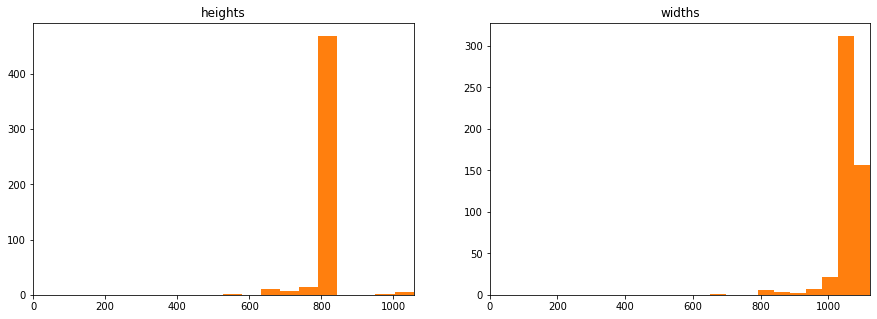

In [13]:
plt.figure(figsize=(15,5))
for i in range(2): 
  plt.subplot(1, 2, i+1)
  if i == 0:
    plt.hist(list_of_heights,bins=20)
    plt.hist(list_of_heights)
    plt.title('heights')
    plt.xlim(0,max(list(set(list_of_heights))))
  else :
    plt.hist(list_of_widths,bins=20)
    plt.hist(list_of_widths)
    plt.title('widths')
    plt.xlim(0,max(list(set(list_of_widths))))



# Observation:                                
The range of height of image lies between 600 - 1000 and range of width of
image lies between 800-1000. We will reshape the image to 1024 * 1024 as the
input of the model should have the same shape required.


In [14]:
#referance :- https://www.geeksforgeeks.org/xml-parsing-python/
dir_path = '/content/content/MyDrive/table_extraction/annote'

xmin_ , ymin_ , xmax_ , ymax_ = list(), list(), list() , list()

filename_ , table_width_, table_height_= list(), list(), list() 

for file in os.listdir(dir_path):
  if file.endswith('.xml'):
    tree = ET.parse(dir_path + '/' + file) 
    root = tree.getroot()
    name=root.find("./filename").text
    width=root.find("./size/width").text
    height=root.find("./size/height").text

    xmin , ymin , xmax , ymax = list(), list(), list() , list()


    for x_min in root.findall("./object/bndbox/xmin"):
      xmin.append(x_min.text)
    
    for y_min in root.findall("./object/bndbox/ymin"):
      ymin.append(y_min.text)
    
    for x_max in root.findall("./object/bndbox/xmax"):
      xmax.append(x_max.text)
    
    for y_max in root.findall("./object/bndbox/ymax"):
      ymax.append(y_max.text)

    filename , table_width, table_height = list(), list(), list() 

    for i in range(0,len(xmax)):
      filename.append(name)
      table_width.append(width)
      table_height.append(height)

    for i in range(0,len(xmax)):
      filename_.append(filename[i])
      table_width_.append(table_width[i])
      table_height_.append(table_height[i])

      xmin_.append(xmin[i])
      ymin_.append(ymin[i])
      xmax_.append(xmax[i])
      ymax_.append(ymax[i])


Dict = dict({'filename': filename_, 'table_width': table_width_, 'table_height':table_height_,
           'xmin':xmin_,'ymin':ymin_,'xmax':xmax_,'ymax':ymax_})


df_marmot=pd.DataFrame.from_dict(Dict)
df_marmot.to_pickle('df_marmot.pkl')

In [15]:
df_marmot.head()

,filename,table_width,table_height,xmin,ymin,xmax,ymax
0,10.1.1.120.1619_13.bmp,816,1056,121,164,238,667
1,10.1.1.120.1619_13.bmp,816,1056,329,163,359,669
2,10.1.1.120.1619_13.bmp,816,1056,384,164,422,670
3,10.1.1.120.1619_13.bmp,816,1056,450,161,490,669
4,10.1.1.120.1619_13.bmp,816,1056,519,164,556,670


In [22]:
##creating table and column mask from marmot dataframe
for m in df_marmot['filename'].unique()[0:1]:
    
    width=int(df_marmot[df_marmot['filename']==m]['table_width'].unique())
    height=int(df_marmot[df_marmot['filename']==m]['table_height'].unique())

    xmin=df_marmot[df_marmot['filename']==m]['xmin'].to_list()
    ymin=df_marmot[df_marmot['filename']==m]['ymin'].to_list()
    xmax=df_marmot[df_marmot['filename']==m]['xmax'].to_list()
    ymax=df_marmot[df_marmot['filename']==m]['ymax'].to_list()


    column_mask = np.zeros((height, width), dtype=np.int32)
    table_mask = np.zeros((height, width), dtype=np.int32)

        
    for k in range(0,len(xmin)):
        xmin[k]=int(xmin[k])
        xmax[k]=int(xmax[k])
        ymin[k]=int(ymin[k])
        ymax[k]=int(ymax[k])

    l1 , l2 = list(),list()
    a = 0
    for j , i  in enumerate(ymin):
      if a == 0:
        a = i
        l2.append(j)
      elif a > 0 and j + 1 < len(ymin):
        if  abs(a-i) <= 50:
          a = i 
          l2.append(j)
        else:
          a = i
          l1.append(l2)
          l2 = []
          l2.append(j)
      else:
        a = i
        l2.append(j)
        l1.append(l2) 

    for k in range(len(l1)):
      x_min = xmin[l1[k][0]:l1[k][len(l1[k])-1]+1]
      y_min = ymin[l1[k][0]:l1[k][len(l1[k])-1]+1]
      x_max = xmax[l1[k][0]:l1[k][len(l1[k])-1]+1]
      y_max = ymax[l1[k][0]:l1[k][len(l1[k])-1]+1]
    
      table_xmin_cordinate=int(min(x_min))
      table_ymin_cordinate=int(min(y_min))
      table_xmax_cordinate=int(max(x_max))
      table_ymax_cordinate=int(max(y_max))
    
      table_mask[table_ymin_cordinate:table_ymax_cordinate, table_xmin_cordinate:table_xmax_cordinate] = 255
    
    for j in range(0,len(xmin)):
        column_mask[int(ymin[j]):int(ymax[j]), int(xmin[j]):int(xmax[j])] = 255
        
    im_col = Image.fromarray(column_mask.astype(np.uint8),'L')
    im_table = Image.fromarray(table_mask.astype(np.uint8),'L')
    im_col.save('/content/content/MyDrive/table_extraction/marmot_column/'+ m+"_col"+".jpeg")
    im_table.save('/content/content/MyDrive/table_extraction/marmot_table/' +m+"_table" + ".jpeg")

In [24]:
#converting marmot image from .bmp to .jpeg file 
file1 = []
for file in os.listdir('/content/content/MyDrive/table_extraction/marmot_column'):
  if file.endswith('.jpeg'):
    file1.append(file[:-13])


dir_path = '/content/content/MyDrive/table_extraction/image/'
count=0
for filename in os.listdir(dir_path):  
  if filename.endswith('.bmp'):
    if filename[:-4] in file1:
      count=count+1
      path='/content/content/MyDrive/table_extraction/image/'+filename
      image=Image.open(path)
      image=image.resize((1024,1024),Image.ANTIALIAS)
      image.save('/content/content/MyDrive/table_extraction/marmots_usuals/'+filename[:-4]+'.jpeg')   


Text(0.5, 1.0, 'Column mask')

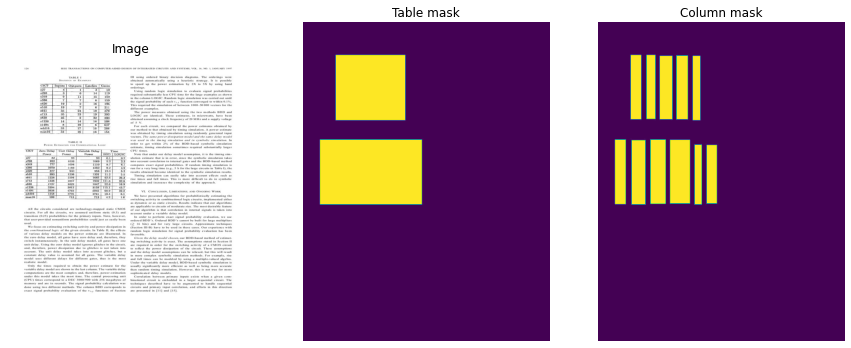

In [46]:
# showing marot image with its corresponding table mask and column mask
fig = plt.figure(figsize=(15, 15))
  

# reading images
Image1 = mpimg.imread('/content/content/MyDrive/table_extraction/marmots_usuals/10.1.1.1.2129_6.jpeg')
Image2 = mpimg.imread('/content/content/MyDrive/table_extraction/marmot_table/10.1.1.1.2129_6.bmp_table.jpeg')
Image3 = mpimg.imread('/content/content/MyDrive/table_extraction/marmot_column/10.1.1.1.2129_6.bmp_col.jpeg')
  
#ploting marmot image
fig.add_subplot(1, 3, 1)
plt.imshow(Image1)
plt.axis('off')
plt.title("Image")
  
#ploting table mask
fig.add_subplot(1, 3, 2)
plt.imshow(Image2)
plt.axis('off')
plt.title("Table mask")
  
#ploting column mask
fig.add_subplot(1, 3, 3)
plt.imshow(Image3)
plt.axis('off')
plt.title("Column mask")


# Now we will check for the another dataset from ICDAR-2017

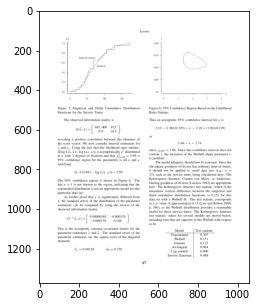

In [48]:
#showing random image file from marmot dataset
image = cv2.imread('/content/content/MyDrive/table_extraction/table_detection/Images/POD_0001.bmp',cv2.IMREAD_UNCHANGED)
plt.figure(figsize=(15,5))
plt.imshow(image)

In [50]:
#showing annotation of corresponding image
with open('/content/content/MyDrive/table_extraction/table_detection/Annotations/POD_0001.xml') as xml_file:
    xml_file = xml.dom.minidom.parseString(xml_file.read())
    xml_file = xml_file.toprettyxml()
print (xml_file)

<?xml version="1.0" ?>
<document filename="POD_0001.xml">
	
	
	<formulaRegion>
		
		
		<Coords points="186,577 414,577 186,619 414,619"/>
		
	
	</formulaRegion>
	
	
	<formulaRegion>
		
		
		<Coords points="176,805 423,805 176,823 423,823"/>
		
	
	</formulaRegion>
	
	
	<formulaRegion>
		
		
		<Coords points="143,1027 458,1027 143,1069 458,1069"/>
		
	
	</formulaRegion>
	
	
	<formulaRegion>
		
		
		<Coords points="179,1194 420,1194 179,1214 420,1214"/>
		
	
	</formulaRegion>
	
	
	<formulaRegion>
		
		
		<Coords points="585,582 935,582 585,599 935,599"/>
		
	
	</formulaRegion>
	
	
	<formulaRegion>
		
		
		<Coords points="701,659 820,659 701,675 820,675"/>
		
	
	</formulaRegion>
	
	
	<tableRegion>
		
		
		<Coords points="636,1098 884,1098 636,1245 884,1245"/>
		
	
	</tableRegion>
	
	
	<figureRegion>
		
		
		<Coords points="578,134 941,134 578,446 941,446"/>
		
	
	</figureRegion>
	
	
	<figureRegion>
		
		
		<Coords points="116,137 479,137 116,446 479,446"/>
		
	
	</figureRegion>
	

</docume

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


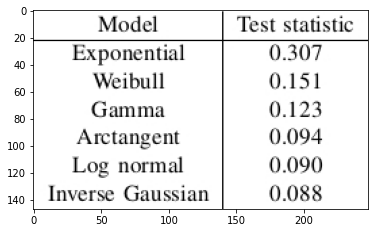

In [51]:
%pylab inline
img=Image.open('/content/content/MyDrive/table_extraction/table_detection/Images/POD_0001.bmp')

x_min=636
y_min=1098
x_max=884
y_max=1245
crop = (x_min,y_min,x_max,y_max)
cropped_table = img.crop(crop)
cropped_table = plt.imshow(cropped_table)
plt.show()

# Observation:
Unfortunately , from the annotation file we can only extract table masks . As per
the research paper, ICDAR-2017 dataset is used as the testing purpose while
marmot dataset is used for training the model.


In [ ]:
##Getting size of images
dir_path = '/content/content/MyDrive/table_extraction/table_detection/Images'
list_of_heights = []
list_of_widths = []
for file in os.listdir(dir_path):
  img = Image.open(dir_path + '/' + file)
  # get dimensions of image
  shape = img.size
  list_of_heights.append(shape[0])
  list_of_widths.append(shape[1]) 

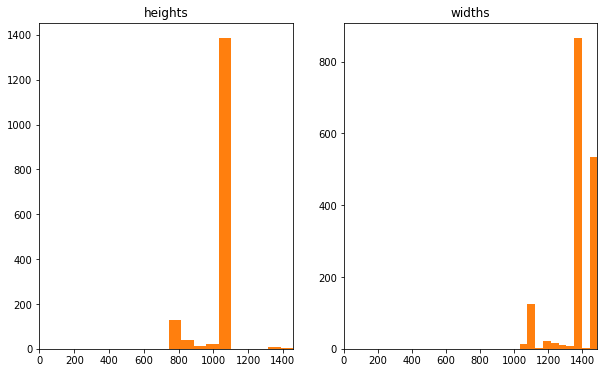

In [ ]:
plt.figure(figsize=(10,6))
for i in range(2): 
  plt.subplot(1, 2, i+1)
  if i == 0:
    plt.hist(list_of_heights,bins=20)
    plt.hist(list_of_heights)
    plt.title('heights')
    plt.xlim(0,max(list(set(list_of_heights))))
  else :
    plt.hist(list_of_widths,bins=20)
    plt.hist(list_of_widths)
    plt.title('widths')
    plt.xlim(0,max(list(set(list_of_widths))))

##Observation:
The range of height of image lies between 800 - 1400 and range of width of
image lies between 1000-1400. We will reshape the image to 1024 * 1024 as the
input of the model should have the same shape required.


In [ ]:
#storing all the cordinate of each file which capture the tabular format in dataframe
dir_path = '/content/content/MyDrive/table_extraction/table_detection/Annotations'

xmin_ , ymin_ , xmax_ , ymax_ = list(), list(), list() , list()

filename_ , table_width_ ,  table_height_ = list(), list() , list()

for file in os.listdir(dir_path):
  if file.endswith('.xml'):
    name = file[:-4]+".bmp"
    tree = ET.parse('/content/content/MyDrive/table_extraction/table_detection/Annotations/' + file)
    root = tree.getroot()

    fname="/content/content/MyDrive/table_extraction/table_detection/Images/" + file[:-4]+".bmp"
    img=Image.open(fname)

    xmin , ymin , xmax , ymax = list(), list(), list() , list()
    filename , table_width , table_height = list(), list() , list()
    if(root.findall("tableRegion")):
      data=root.findall("tableRegion/Coords")
      for i in range(0,len(data)):
        point=data[i].get("points")
        filename.append(name)
        table_width.append(img.size[0])
        table_height.append(img.size[1])
        points=point.split(" ")
        points = [[int(num) for num in string.split(",")] for string in points]
        coordinate = []
        for values in points:
          for value in values:
            coordinate.append(value)

        xmin.append(coordinate[0])
        ymin.append(coordinate[1])
        xmax.append(coordinate[6])
        ymax.append(coordinate[7])

      for i in range(0,len(data)):
        filename_.append(filename[i])
        table_width_.append(table_width[i])
        table_height_.append(table_height[i])
        xmin_.append(xmin[i])
        ymin_.append(ymin[i])
        xmax_.append(xmax[i])
        ymax_.append(ymax[i])
    
    else:
      filename_.append(name)
      table_width_.append(img.size[0])
      table_height_.append(img.size[1])
      xmin_.append(0)
      ymin_.append(0)
      xmax_.append(0)
      ymax_.append(0)          

Dict = dict({'filename': filename_,'table_width': table_width_, 'table_height':table_height_,'xmin':xmin_,'ymin':ymin_,'xmax':xmax_,'ymax':ymax_})


df=pd.DataFrame.from_dict(Dict)
df.to_pickle('df_ICDAR.pkl')

In [ ]:
df.head(5)

,filename,table_width,table_height,xmin,ymin,xmax,ymax
0,POD_0893.bmp,1031,1459,122,501,884,613
1,POD_0301.bmp,1031,1459,192,89,843,309
2,POD_0147.bmp,1031,1459,0,0,0,0
3,POD_0393.bmp,1031,1459,164,142,896,396
4,POD_0573.bmp,1061,1373,148,161,909,670


In [ ]:
#creating table mask from ICDAR dataframe
for m in df['filename'].unique():
    width=int(df[df['filename']==m]['table_width'].unique())
    height=int(df[df['filename']==m]['table_height'].unique())
    
    xmin=df[df['filename']==m]['xmin'].to_list()
    ymin=df[df['filename']==m]['ymin'].to_list()
    xmax=df[df['filename']==m]['xmax'].to_list()
    ymax=df[df['filename']==m]['ymax'].to_list()

    table_mask = np.zeros((height, width), dtype=np.int32)

    for i in range(len(xmin)):
      table_xmin=xmin[i]
      table_ymin=ymin[i]
      table_xmax=xmax[i]
      table_ymax=ymax[i]
    

      table_mask[table_ymin:table_ymax, table_xmin:table_xmax] = 255 

    im_table = Image.fromarray(table_mask.astype(np.uint8),'L')
    im_table.save('/content/content/MyDrive/table_extraction/ICDAR_table/' +m+"_table" + ".jpeg")  

Text(0.5, 1.0, 'Table mask')

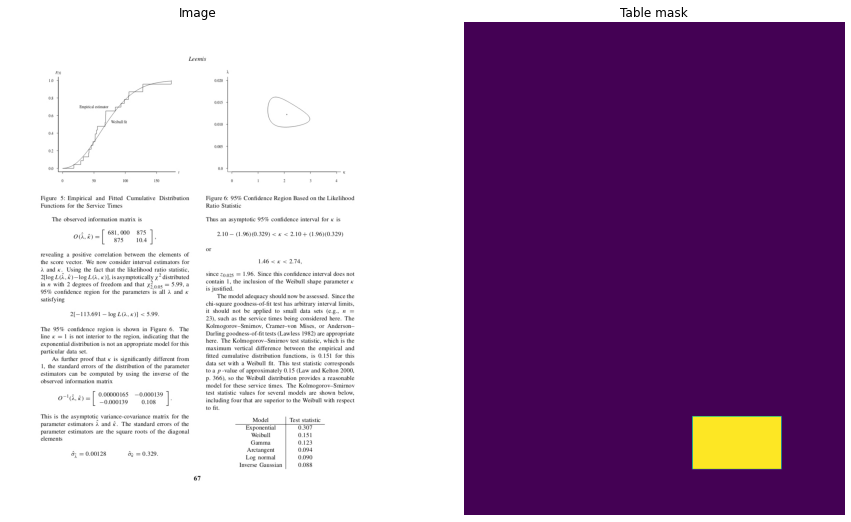

In [54]:
# showing marot image with its corresponding table mask and column mask
fig = plt.figure(figsize=(15, 10))
  

# reading images
Image1 = mpimg.imread('/content/content/MyDrive/table_extraction/table_detection/Images/POD_0001.bmp')
Image2 = mpimg.imread('/content/content/MyDrive/table_extraction/ICDAR_table/POD_0001.bmp_table.jpeg')
  
#ploting marmot image
fig.add_subplot(1, 2, 1)
plt.imshow(Image1)
plt.axis('off')
plt.title("Image")
  
#ploting table mask
fig.add_subplot(1, 2, 2)
plt.imshow(Image2)
plt.axis('off')
plt.title("Table mask")
  

# Conclusion:
from the two dataset, we will use marmot dataset for training the model and ICDAR dataset for testing the model as model required two output for comparision which is not available from ICDAR dataset.